In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Here, I read in the data from parks.csv. This dataset contains the name, type of park, neighborhood, maintenance, zoning, images, and exact location. For our project I based my metric on the quantity of these various types of parks in a neighborhood.

In [5]:
parks = pd.read_csv("parks.csv")

In [6]:
num_parks = parks.groupby("neighborhood").size()

In [7]:
num_parks.head

<bound method NDFrame.head of neighborhood
Allegheny Center       2
Allentown              2
Arlington              1
Banksville             2
Bedford Dwellings      1
                      ..
Upper Lawrenceville    3
West End               2
West Oakland           1
Westwood               3
Windgap                1
Length: 73, dtype: int64>

In [10]:
num_parks.sort_values(ascending=False)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
Point Breeze                  7
South Side Slopes             7
                             ..
Homewood West                 1
Oakwood                       1
Middle Hill                   1
North Oakland                 1
Windgap                       1
Length: 73, dtype: int64

Above, I created a decending table of the neighborhood and their park count with the highest quanitities shown higher on the table.

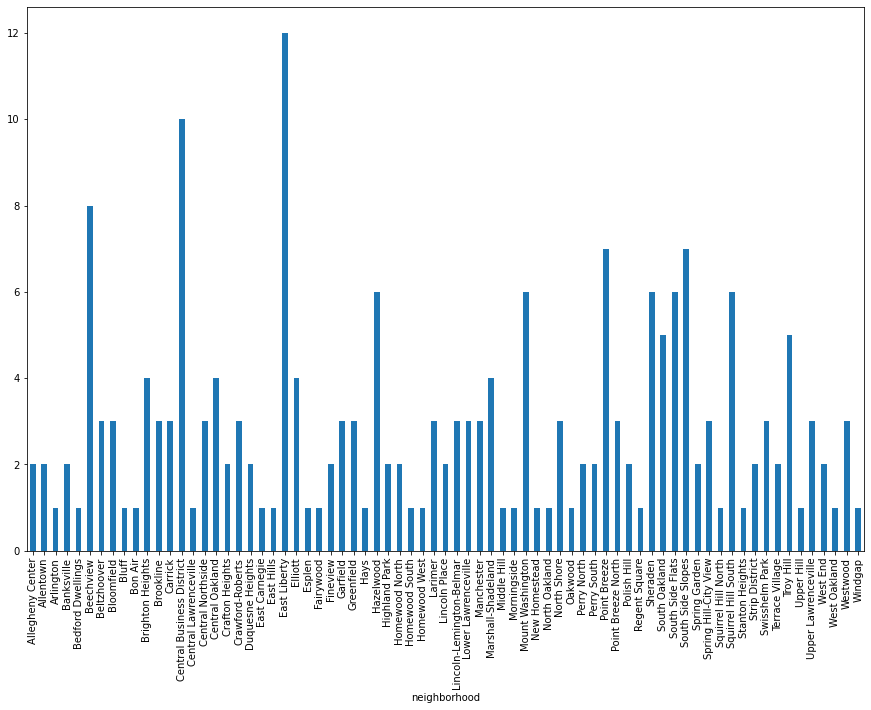

In [11]:
num_parks.plot.bar(figsize=(15,10))

This bar chart presents an informative overview of the distribution of parks and their quanitites in alphabetical order. This visual aid allows us to see the wide range between neighborhoods in Pittsburgh with the smallest being one park, and the largest being twelve.

,hood,parks,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


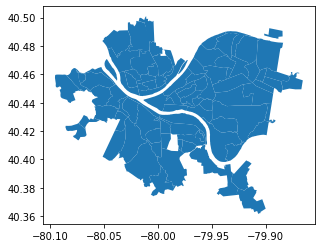

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
parks_map = neighborhoods.merge(num_parks.rename("parks"), how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','parks','geometry']].head()

I merged the data that I extracted from the parks.csv and combined it with the file Neighborhoods_.shp to allow me to create a more comprehensive visual of the park distribution. The blue map above shows the Pittsburgh area before it has been merged with the park data.

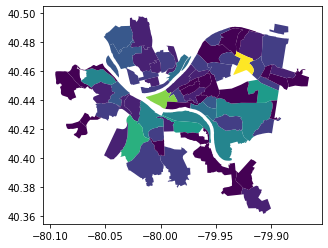

In [11]:
parks_map.plot(column='parks')

The graph above allows us to see the dispersion of parks in Pittsburgh, though it it not very readable yet. The color gradient is not intuitive, and there is no information provided telling me how to interpret this graph.

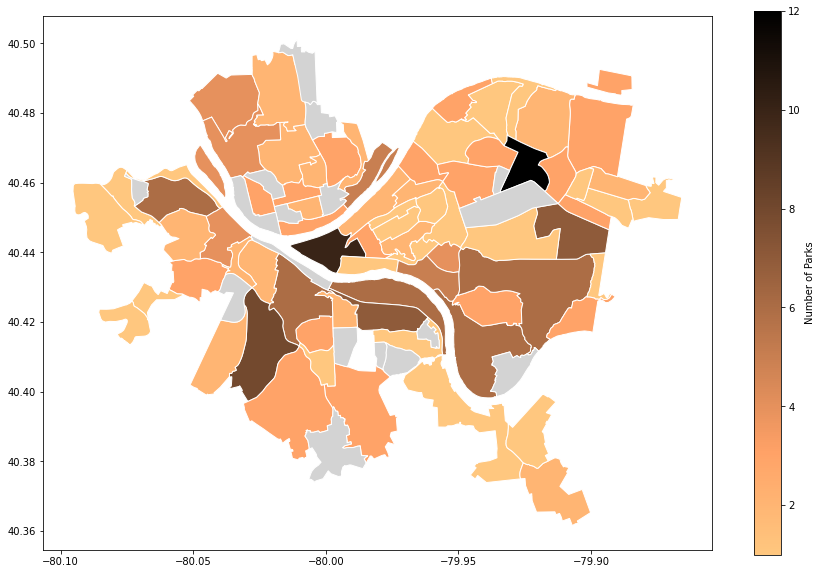

In [22]:
parks_map.plot(column='parks', # set the data to be used for coloring
               cmap='copper_r',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

To address this problem, I adjusted the color gradient, adjusted the size, and appropriately labelled the data to improve comprehension and clearly see where the density of parks in Pittsburgh is highest and lowest.

Based on my chosen metric, quantity of parks, I determined that the best neighborhood in Pittsburgh is East Liberty. Because East Libery has the highest number of parks, this neighborhood is best place to be motivated to leave your house. 